In [1]:
# %matplotlib qt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import time
import copy
import numpy as np
from skimage.filters import gaussian_filter
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


# Load time-lapse data...

In [2]:
folder = '/Users/jug/Repositories/GIT/BobSeg/AmyMaddox/'
#folder = '/Users/maddox/Jug/Data/'

filename = folder + 'Reslice_of_298_crop.tif'
#filename = folder + 'Reslice_of_nd324_crop_16b.tif'

stack = imread(filename)
stack = stack / np.max(stack.astype(float))
print 'Stack shape:',stack.shape

sigma = [0.,3.,3.]
stack_smooth = gaussian_filter(stack,sigma)

sigma_bg_level = [0.,50.,50.]
stack_bg_level = gaussian_filter(stack,sigma_bg_level)

Stack shape: (76, 395, 490)


/usr/local/lib/python2.7/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
/usr/local/lib/python2.7/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


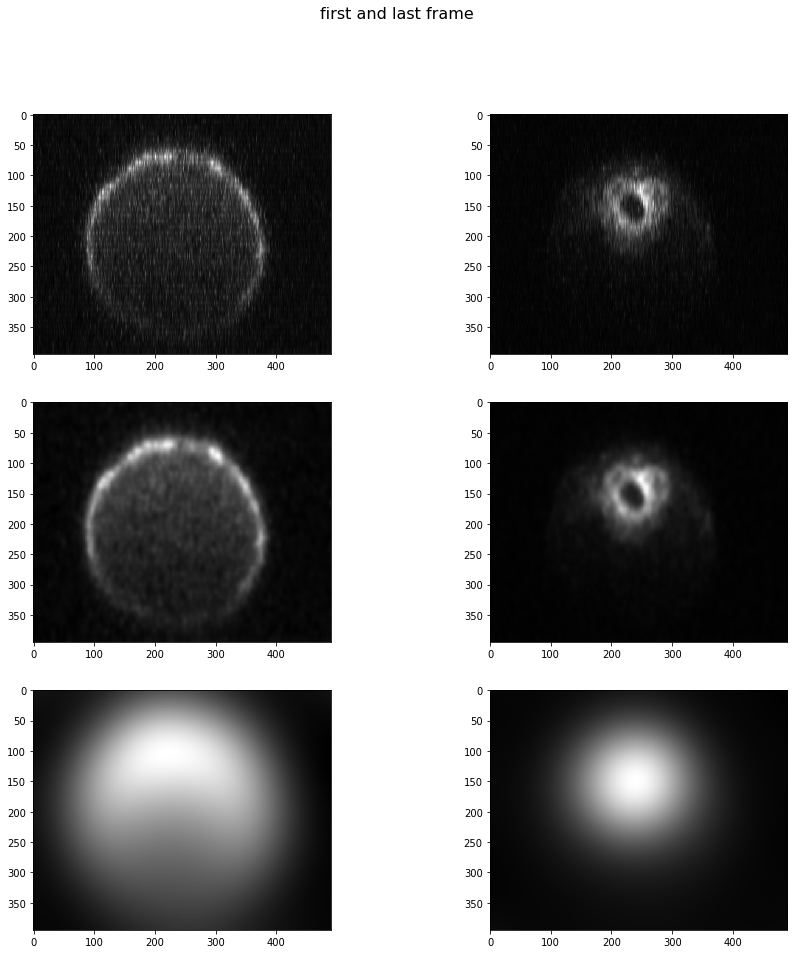

In [3]:
pylab.rcParams['figure.figsize'] = (15, 15)

fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(321)
ax.imshow(stack[0], plt.get_cmap('gray'))
ax = fig.add_subplot(322)
ax.imshow(stack[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(323)
ax.imshow(stack_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(324)
ax.imshow(stack_smooth[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(325)
ax.imshow(stack_bg_level[0], plt.get_cmap('gray'))
ax = fig.add_subplot(326)
ax.imshow(stack_bg_level[-1], plt.get_cmap('gray'))

In [4]:
max_rs = (stack[0].shape[1] / 2.5,
          stack[0].shape[1] / 2.5)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (196.0, 196.0)


# Adding ring

In [5]:
data = Data3d( stack_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=200,max_delta_k=1)
objects = []

In [6]:
ring = data.init_object("ring")
objects.append(ring)

In [7]:
cx = stack.shape[2] / 2
cy = stack.shape[1] / 2
data.add_object_at( ring, min_rs, max_rs, frame=0, seed=(cx,cy), segment_it=True )
data.track(ring, seed_frame=0, target_frames=range(0,len(data.images)), recenter_iterations=2)

Added appearance for "ring" in frame 0 with seed coordinates [ 245.  197.]
      Optimum energy:  5.09139082509
      Nodes in/out:  10008 4392
      Area:  58185.5
Added appearance for "ring" in frame 0 with seed coordinates [ 245.  197.]
      Optimum energy:  5.09139082509
      Nodes in/out:  10008 4392
      Area:  58185.5
    Updated center to [238 200]
    Updated center to [238 200]
Added appearance for "ring" in frame 1 with seed coordinates [ 238.  200.]
      Optimum energy:  4.50566609471
      Nodes in/out:  10240 4160
      Area:  60838.0
    Updated center to [234 204]
    Updated center to [234 204]
Added appearance for "ring" in frame 2 with seed coordinates [ 234.  204.]
      Optimum energy:  4.000889611
      Nodes in/out:  10340 4060
      Area:  61851.0
    Updated center to [233 208]
    Updated center to [233 208]
Added appearance for "ring" in frame 3 with seed coordinates [ 233.  208.]
      Optimum energy:  3.651702731
      Nodes in/out:  10403 3997
      Ar

    Updated center to [253 203]
Added appearance for "ring" in frame 36 with seed coordinates [ 253.  203.]
      Optimum energy:  2.87510810067
      Nodes in/out:  8121 6279
      Area:  38610.5
    Updated center to [252 199]
    Updated center to [252 199]
Added appearance for "ring" in frame 37 with seed coordinates [ 252.  199.]
      Optimum energy:  2.7326012959
      Nodes in/out:  7933 6467
      Area:  36829.5
    Updated center to [251 195]
    Updated center to [251 195]
Added appearance for "ring" in frame 38 with seed coordinates [ 251.  195.]
      Optimum energy:  2.83415958418
      Nodes in/out:  7820 6580
      Area:  35812.5
    Updated center to [250 192]
    Updated center to [250 192]
Added appearance for "ring" in frame 39 with seed coordinates [ 250.  192.]
      Optimum energy:  2.50656922114
      Nodes in/out:  7743 6657
      Area:  35152.0
    Updated center to [250 190]
    Updated center to [250 190]
Added appearance for "ring" in frame 40 with seed coo

      Optimum energy:  2.92585194926
      Nodes in/out:  2111 12289
      Area:  3097.0
    Updated center to [236 145]
    Updated center to [236 145]
Added appearance for "ring" in frame 74 with seed coordinates [ 236.  145.]
      Optimum energy:  3.47019060268
      Nodes in/out:  1942 12458
      Area:  2678.5
    Updated center to [234 147]
    Updated center to [234 147]
Added appearance for "ring" in frame 75 with seed coordinates [ 234.  147.]
      Optimum energy:  3.16616473228
      Nodes in/out:  1840 12560
      Area:  2456.5
    Updated center to [233 149]
    Updated center to [233 149]


In [8]:
#data.segment2dt( ring, max_radial_delta=3 )

# Visualisation stuff 

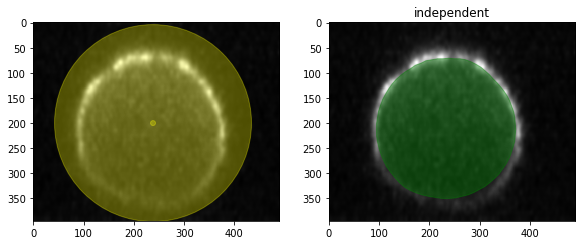

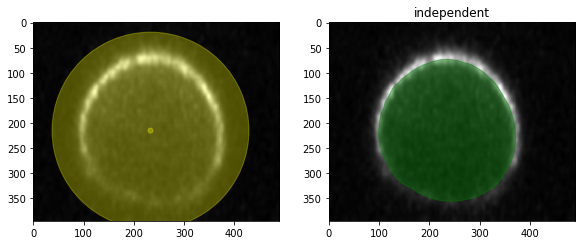

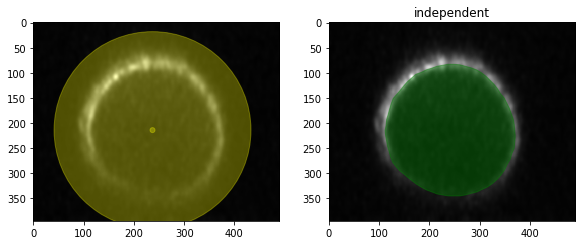

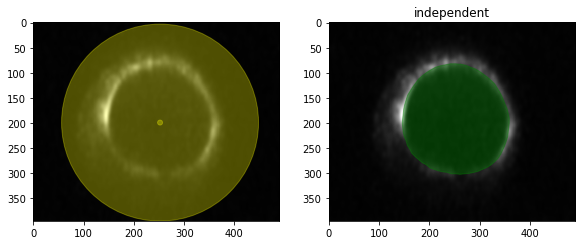

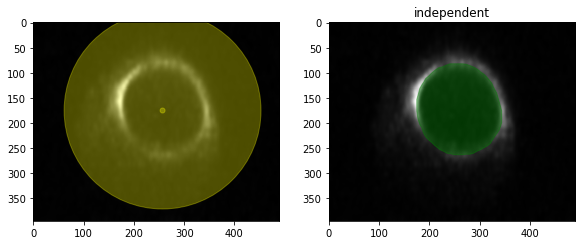

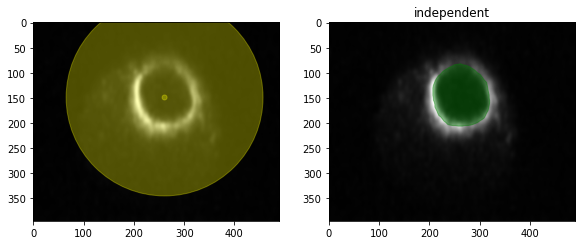

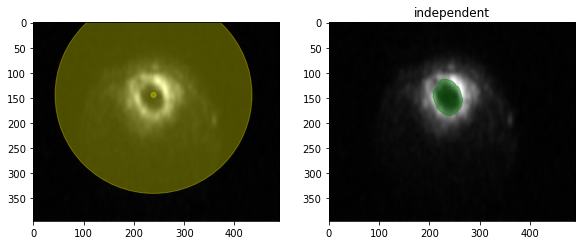

In [9]:
pylab.rcParams['figure.figsize'] = (15, 7)
for frame in range(1,len(data.images),len(data.images)/6):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )    
    #ax = plt.subplot(133)
    #ax.set_title('2dt')
    #data.plot_2dt_result( frame, ax )

In [10]:
spiral = np.zeros( (len(data.object_seedpoints[0]), 3) )
xs = np.zeros( len(data.object_seedpoints[0]) )
ys = np.zeros( len(data.object_seedpoints[0]) )

In [11]:
# read the center seeds he found for frames
for i in range(len(data.object_seedpoints[0])):
    xs[i] = data.object_seedpoints[0][i][0]    
    ys[i] = data.object_seedpoints[0][i][1]

In [12]:
# get k values over time
kovert = data.get_k_over_time(ring)[:,:60]
print kovert.shape

AttributeError: 'NoneType' object has no attribute 'get_surface_index'

In [13]:
np.max(stack_smooth)

0.93833112030002297

In [14]:
from moviemaker2d import MovieMaker2d
mm = MovieMaker2d(False)
frames, centers, all_polygones, radii = mm.draw_segmentation(data, stack, folder=None, inline=True)

error: /tmp/opencv-20170224-1869-10nlf6f/opencv-2.4.13.2/modules/imgproc/src/color.cpp:3644: error: (-215) depth == CV_8U || depth == CV_16U || depth == CV_32F in function cvtColor


In [15]:
for f in range(len(frames)):
    imsave(folder+'movie_export/frame%02d.tif'%(f), frames[f])

NameError: name 'frames' is not defined

# Measuring intensities

In [16]:
delta_radius = 15 #this defines the width of the ring within to measure

In [17]:
def measure_intensities( stack, centers, polygone_points, radii):
    return 5

In [18]:
measure_intensities( stack, centers[0], all_polygones[0], radii )

NameError: name 'centers' is not defined

In [19]:
np.round(np.linspace(1,72,10))

array([  1.,   9.,  17.,  25.,  33.,  40.,  48.,  56.,  64.,  72.])

In [23]:
centers = []
radii = []
masks = []
for f in range(len(stack)):
    # for each polygone point figure out how it relates to circle position
    center = tuple(data.object_seedpoints[0][f])
    idxes=[]
    for i in range(data.num_columns):
        if data.netsurf2dt[0] is None:
            idx = data.netsurfs[0][f].get_surface_index(i)
        else:
            idx = data.netsurf2dt[0].get_surface_index(f, i)
        idxes.extend([idx])
        # r += idx
    # r /= data.num_columns
    r = median(idxes)
    r /= data.K
    r *= data.object_max_surf_dist[0][f][0] - data.object_min_surf_dist[0][f][0]
    r += data.object_min_surf_dist[0][f][0]

    cx, cy = center
    r_inner = r-delta_radius
    r_outer = r+delta_radius

    y,x = np.ogrid[-cy:size_y-cy, -cx:size_x-cx]
    mask1 = x*x + y*y <= r_outer*r_outer 
    mask2 = x*x + y*y >= r_inner*r_inner
    mask = mask1 & mask2
    
    centers.append(center)
    radii.append(r)
    masks.append(mask)

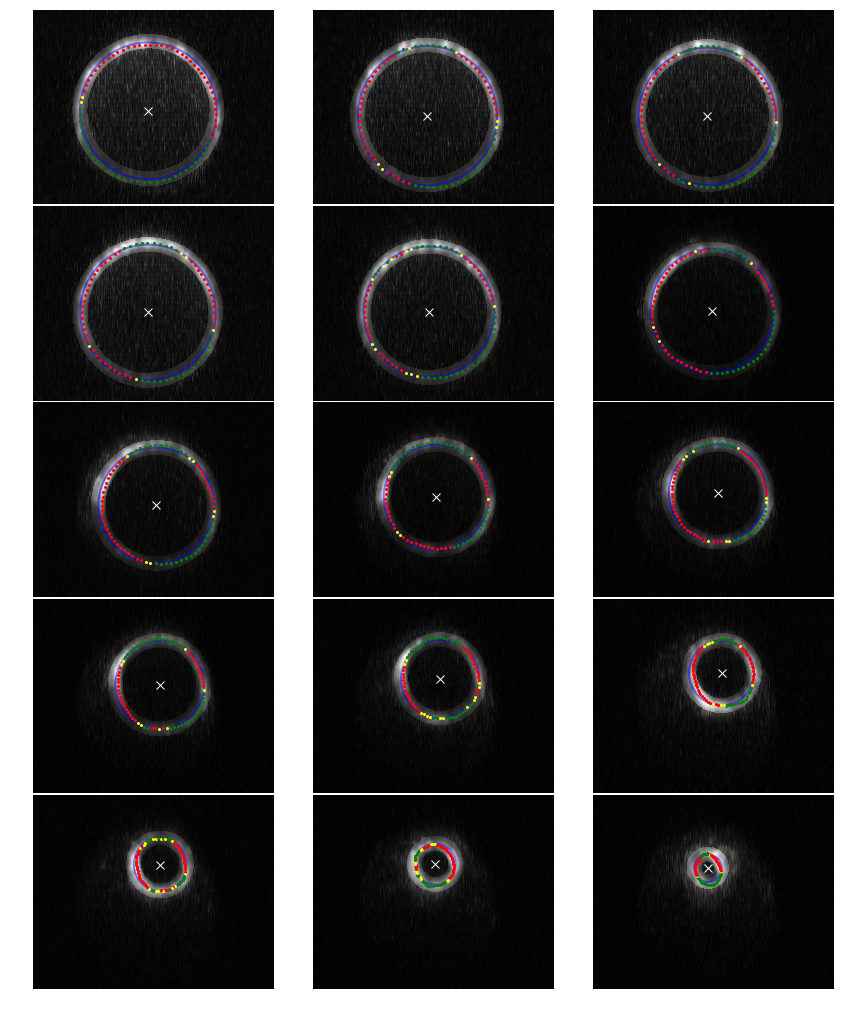

In [21]:
plotsx=3
plotsy=5

size_x = shape(stack[0])[1]
size_y = shape(stack[0])[0]

figheight=15
fig, axs = pylab.subplots(plotsy, plotsx, figsize=(figheight, int(figheight*(float(size_x)/size_y))))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

for i,f in enumerate(np.linspace(1,len(stack)-1,num=(plotsx*plotsy),dtype=int)):
    ax = axs[i]
    ax.axis('off')
    
    # get all segmentation polygones for frame f (there is only one, but still)
    polygone = None
    if data.netsurf2dt[0] is None:
        polygone = data.get_result_polygone(0, f)
    else:
        polygone = data.get_result_polygone_2dt(0, f)
            
    # for each polygone point figure out how it relates to circle position
    center = tuple(data.object_seedpoints[0][f])
    idxes=[]
    for i in range(data.num_columns):
        if data.netsurf2dt[0] is None:
            idx = data.netsurfs[0][f].get_surface_index(i)
        else:
            idx = data.netsurf2dt[0].get_surface_index(f, i)
        idxes.extend([idx])
        # r += idx
    # r /= data.num_columns
    r = median(idxes)
    r /= data.K
    r *= data.object_max_surf_dist[0][f][0] - data.object_min_surf_dist[0][f][0]
    r += data.object_min_surf_dist[0][f][0]

    cx, cy = center
    r_inner = r-delta_radius
    r_outer = r+delta_radius

    y,x = np.ogrid[-cy:size_y-cy, -cx:size_x-cx]
    mask1 = x*x + y*y <= r_outer*r_outer 
    mask2 = x*x + y*y >= r_inner*r_inner
    mask = mask1 & mask2
    
    # PLOTTING BUSINESS
    tmp = np.maximum(stack_smooth[f]*mask, .6*stack[f]*np.logical_not(mask))
    ax.imshow(tmp, plt.get_cmap('gray'))
    
    ax.plot([center[0]], [center[1]], marker='x', markersize=8, color="white")
    
    for p in polygone:
        d = math.sqrt( (p[0]-center[0])**2 + (p[1]-center[1])**2 )
        if (int(d) > int(r)):
            ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="green")
        else:
            if (int(d) < int(r)):
                ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="red")
            else:
                ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="yellow")
    
    circle = pylab.Circle(center, r, color='b', fill=False, lw=2, alpha=0.5)
    ax.add_artist(circle)